In this blog post, I will be discussing a simple price categorization system for used cell phones in an online shop. The aim is to use the K-Mean method to distribute cell phones among different price categories, based on their mobile specifications.   

# Data
I used the data-set from kaggle website ([data-set](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)). In this data-set we know the following information: 

|Variable name |Description| 
|:-----|:-----|
|battery_power |Total energy a battery can store in one time measured in mAh|
|int_memory|Internal Memory in Gigabytes|
|mobile_wt|Weight of mobile phone|
|ram|Random Access Memory in Megabytes|



In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\rtava\\OneDrive\\Documents\\Git\\MLProject\\posts\\K_Mean\\Mobile_dataset.csv")
df = df[['battery_power','int_memory','mobile_wt','ram']]

In [3]:
df.head()

,battery_power,int_memory,mobile_wt,ram
0,1043,5,193,3476
1,841,61,191,3895
2,1807,27,186,2396
3,1546,25,96,3893
4,1434,49,108,1773


In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.values[:,1:]
X = np.nan_to_num(X)
x_data = StandardScaler().fit_transform(X)

In [5]:
from sklearn.cluster import KMeans 


k_means = KMeans(init = "k-means++", n_clusters = 4, 
                 n_init=12, random_state=42)

k_means.fit(x_data)
df['Cluster'] = k_means.labels_

In [6]:
k_means.inertia_

1399.5706844598799

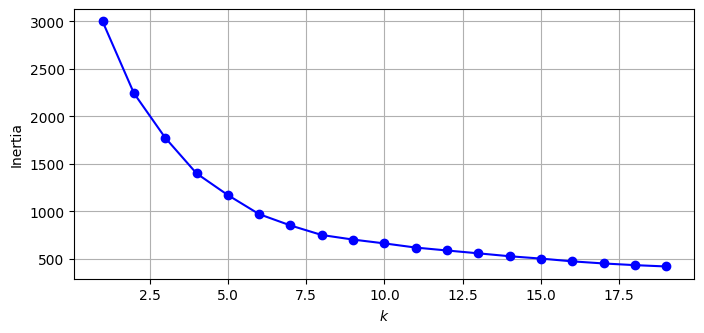

In [9]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x_data)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]


plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.grid()
plt.show();

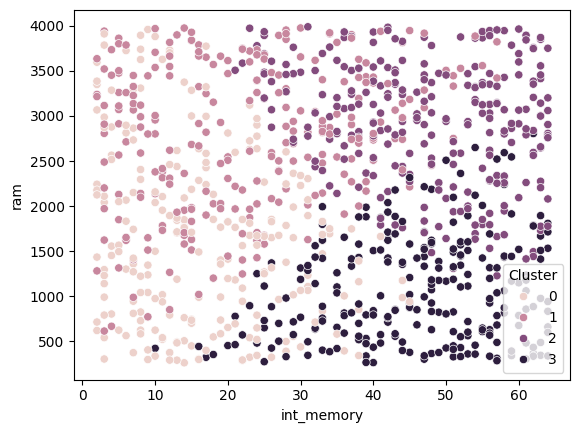

In [10]:
import seaborn as sns
sns.scatterplot(data=df, x="int_memory", y="ram", hue="Cluster");